In [1]:
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [2]:
xl = pd.ExcelFile(r"C:\Users\shyam\Desktop\project\MIN_TEMP.xls")
xl.sheet_names
df = xl.parse("Sheet1")
df.head(100)

,DATE,MIN-TEMP
0,1983-01-01,21.0
1,1983-01-02,21.0
2,1983-01-03,22.0
3,1983-01-04,24.0
4,1983-01-05,26.0
...,...,...
95,1983-04-06,24.0
96,1983-04-07,25.0
97,1983-04-08,24.0
98,1983-04-09,24.0


In [3]:
df.index = np.arange(1, len(df) + 1)
df.columns = ['Date','MIN_TEMP']
df.head()

,Date,MIN_TEMP
1,1983-01-01,21.0
2,1983-01-02,21.0
3,1983-01-03,22.0
4,1983-01-04,24.0
5,1983-01-05,26.0


In [4]:
df.isnull().sum(axis=0)

Date        0
MIN_TEMP    0
dtype: int64

In [5]:
df.describe()

,MIN_TEMP
count,9086.000000
mean,23.382841
std,1.801724
min,16.500000
25%,22.500000
50%,23.500000
75%,24.375000
max,30.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9086 entries, 1 to 9086
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9086 non-null   datetime64[ns]
 1   MIN_TEMP  9086 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 213.0 KB


In [7]:
df['Month'] = df['Date'].dt.strftime('%b')
df.head()

,Date,MIN_TEMP,Month
1,1983-01-01,21.0,Jan
2,1983-01-02,21.0,Jan
3,1983-01-03,22.0,Jan
4,1983-01-04,24.0,Jan
5,1983-01-05,26.0,Jan


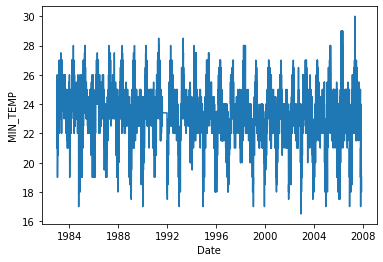

In [8]:
x = df.Date
y = df.MIN_TEMP
sns.lineplot(x = x, y = y, data = df)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [9]:
df.isnull().sum()

Date        0
MIN_TEMP    0
Month       0
dtype: int64

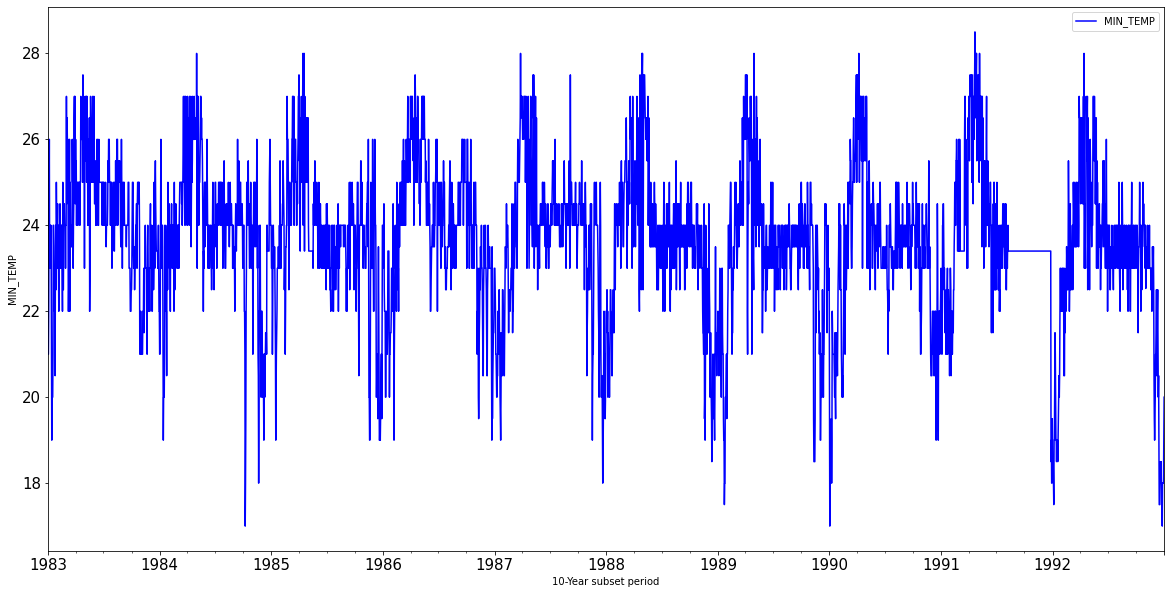

In [10]:
df1=df.copy()
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace=True)
df1 = df1['1983-01-01':'1992-12-31']

curve = df1.plot(color='blue', fontsize=15)
plt.xlabel('10-Year subset period')
plt.ylabel('MIN_TEMP')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

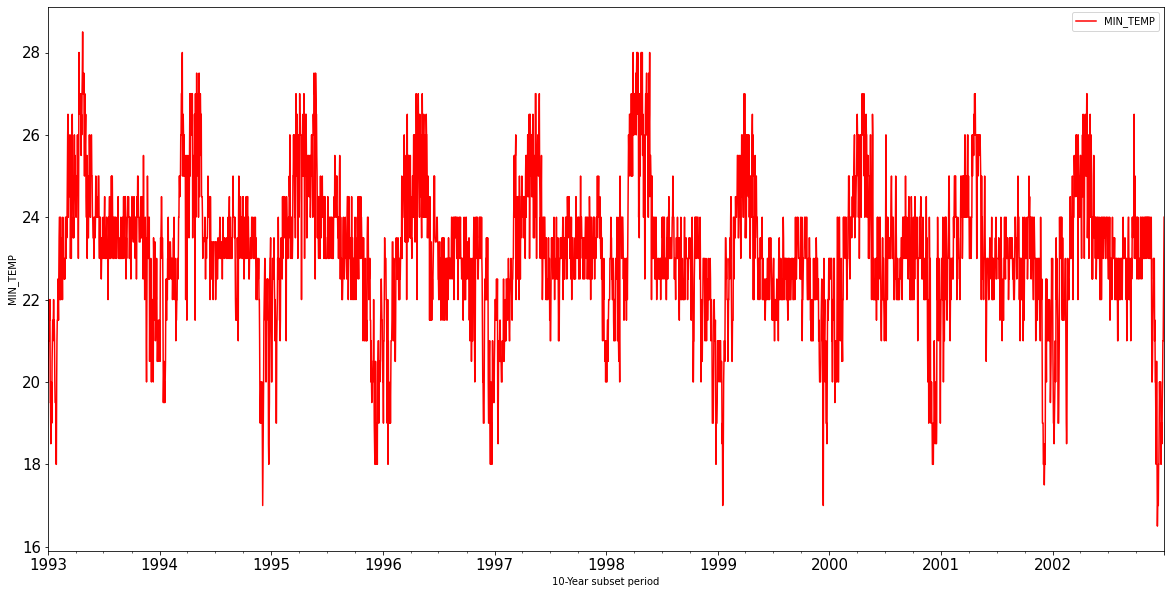

In [11]:
df2=df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date',inplace=True)
df2 = df2['1993-01-01':'2002-12-31']
curve = df2.plot(color='red', fontsize=15)
plt.xlabel('10-Year subset period')
plt.ylabel('MIN_TEMP')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [12]:
# Checking for monthly time scale
df4=df
df4['Month_Year'] = df['Date'].dt.strftime('%y-%b')
df4=df.groupby(df.Month_Year,sort=False)['MIN_TEMP'].mean()
df4.head(12)

Month_Year
83-Jan    22.645161
83-Feb    23.625000
83-Mar    24.612903
83-Apr    25.266667
83-May    25.725806
83-Jun    24.950000
83-Jul    24.564516
83-Aug    24.800000
83-Sep    23.783333
83-Oct    23.625806
83-Nov    22.283333
83-Dec    23.448387
Name: MIN_TEMP, dtype: float64

Text(0, 0.5, 'monthly average')

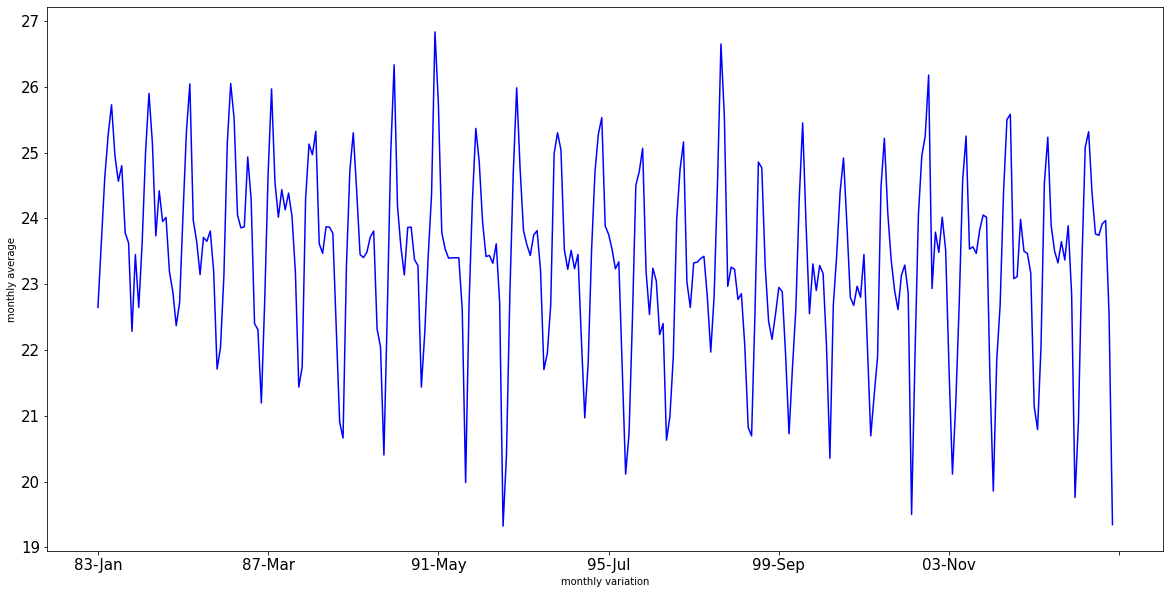

In [13]:
curve = df4.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('monthly variation')
plt.ylabel('monthly average')

In [14]:
# Checking for Annual time scale
df['Year']=df['Date'].dt.strftime('%y')
df.head()

,Date,MIN_TEMP,Month,Month_Year,Year
1,1983-01-01,21.0,Jan,83-Jan,83
2,1983-01-02,21.0,Jan,83-Jan,83
3,1983-01-03,22.0,Jan,83-Jan,83
4,1983-01-04,24.0,Jan,83-Jan,83
5,1983-01-05,26.0,Jan,83-Jan,83


In [15]:
df5 = df.groupby(df.Year,sort=False)['MIN_TEMP'].mean()
df5.head(10)

Year
83    24.115342
84    23.907650
85    23.743014
86    23.967397
87    23.732877
88    23.601093
89    23.382192
90    23.414521
91    23.843918
92    23.069754
Name: MIN_TEMP, dtype: float64

Text(0, 0.5, 'Annual average')

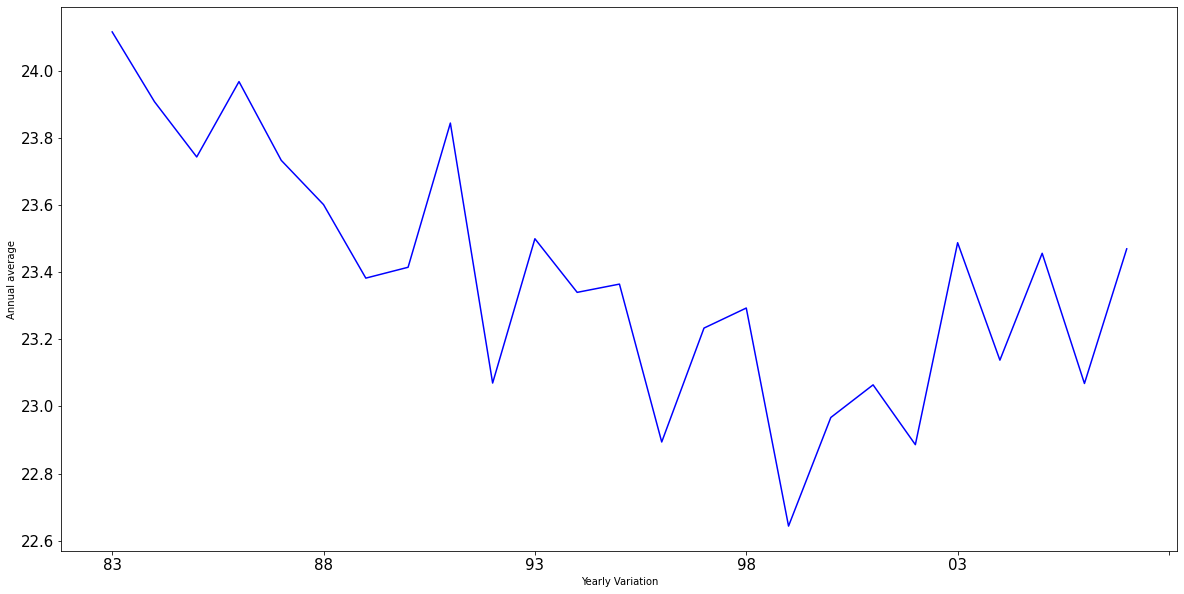

In [16]:
curve = df5.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Yearly Variation')
plt.ylabel('Annual average')

In [17]:
#Monsoon season consists of June, July, August and Septemeber
def season_categoriser(x):
    if x.month==6 or x.month==7 or x.month==8 or x.month ==9:
        x='Monsoon only'+' '+str(x.year)
    else:
        x='Non-Monsoon'+' '+str(x.year)
    return x

In [18]:
df6=df
df6['Season'] = df['Date'].apply(season_categoriser)
df6.head(180)

,Date,MIN_TEMP,Month,Month_Year,Year,Season
1,1983-01-01,21.0,Jan,83-Jan,83,Non-Monsoon 1983
2,1983-01-02,21.0,Jan,83-Jan,83,Non-Monsoon 1983
3,1983-01-03,22.0,Jan,83-Jan,83,Non-Monsoon 1983
4,1983-01-04,24.0,Jan,83-Jan,83,Non-Monsoon 1983
5,1983-01-05,26.0,Jan,83-Jan,83,Non-Monsoon 1983
...,...,...,...,...,...,...
176,1983-06-25,25.0,Jun,83-Jun,83,Monsoon only 1983
177,1983-06-26,25.0,Jun,83-Jun,83,Monsoon only 1983
178,1983-06-27,24.0,Jun,83-Jun,83,Monsoon only 1983
179,1983-06-28,25.0,Jun,83-Jun,83,Monsoon only 1983


In [19]:
df7 = df6[df6['Season'].str.contains('Non-Monsoon')]
df8 = df6[df6['Season'].str.contains('Monsoon only')]

In [20]:
df7 = df7.groupby(df7.Season,sort=False)['MIN_TEMP'].mean()
df7.head(10)

Season
Non-Monsoon 1983    23.908642
Non-Monsoon 1984    23.845492
Non-Monsoon 1985    23.846502
Non-Monsoon 1986    23.864609
Non-Monsoon 1987    23.477366
Non-Monsoon 1988    23.549180
Non-Monsoon 1989    23.316872
Non-Monsoon 1990    23.318930
Non-Monsoon 1991    24.003292
Non-Monsoon 1992    22.842336
Name: MIN_TEMP, dtype: float64

In [21]:
df8 = df8.groupby(df8.Season,sort=False)['MIN_TEMP'].mean()
df8.head(10)

Season
Monsoon only 1983    24.527049
Monsoon only 1984    24.031967
Monsoon only 1985    23.536885
Monsoon only 1986    24.172131
Monsoon only 1987    24.241803
Monsoon only 1988    23.704918
Monsoon only 1989    23.512295
Monsoon only 1990    23.604918
Monsoon only 1991    23.526475
Monsoon only 1992    23.524590
Name: MIN_TEMP, dtype: float64

Text(0, 0.5, 'Seasonal Average')

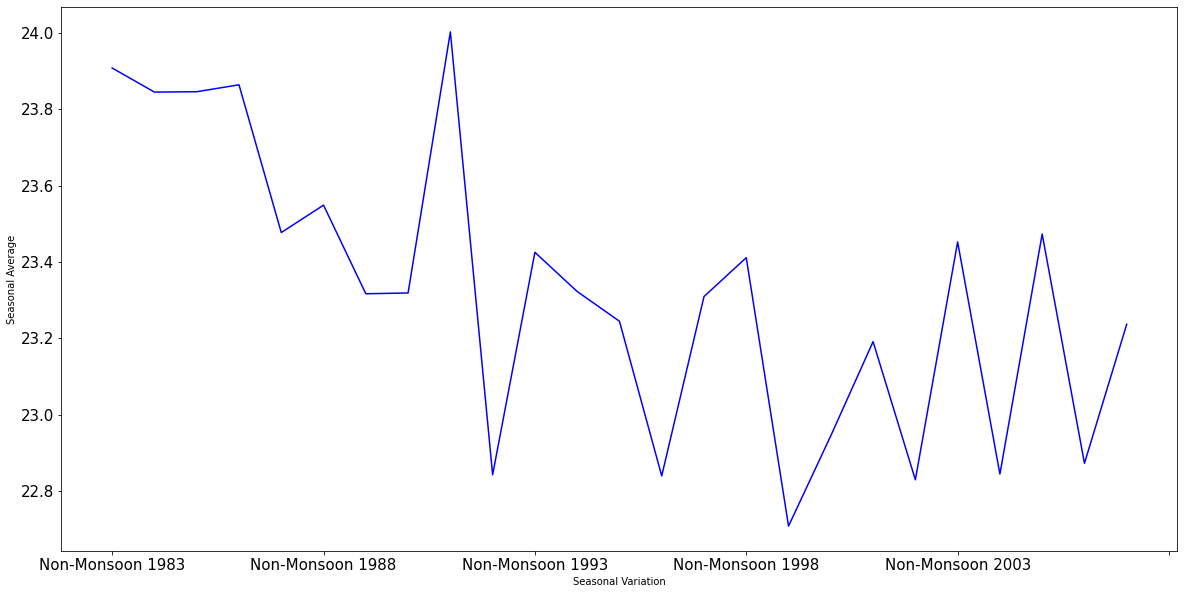

In [22]:
curve = df7.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Seasonal Variation')
plt.ylabel('Seasonal Average')

Text(0, 0.5, 'Seasonal Average')

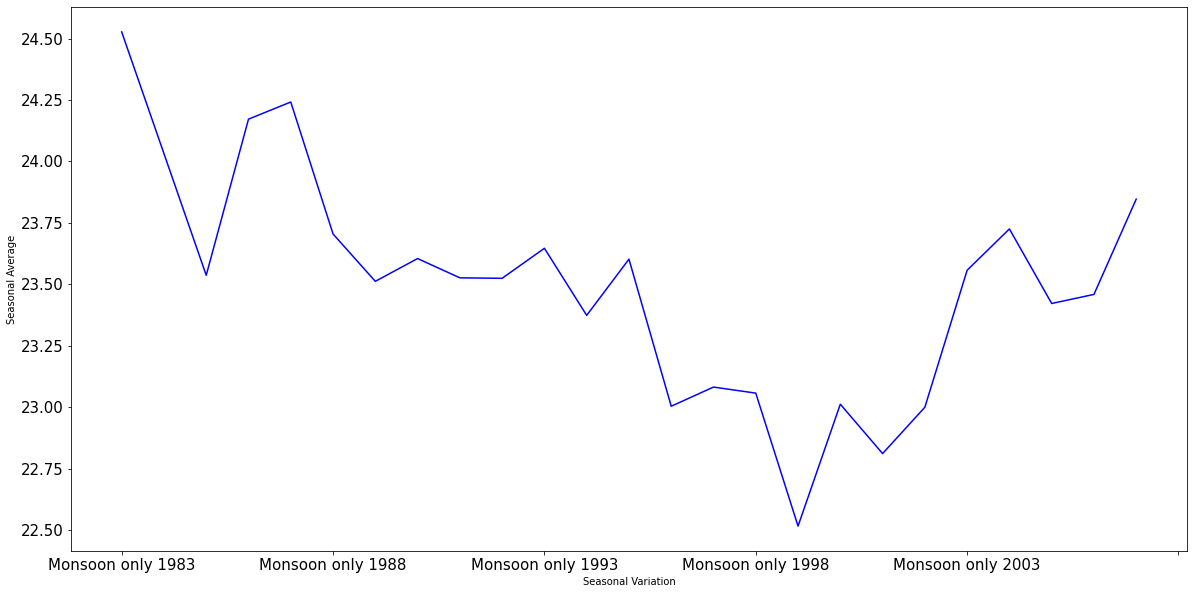

In [23]:
curve = df8.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Seasonal Variation')
plt.ylabel('Seasonal Average')

In [24]:
#Mann-Kendall test for trend analysis
import pip
pip.main(['install','pymannkendall'])
import pymannkendall as mk

stat1= mk.original_test(df['MIN_TEMP'])
print(stat1)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-14.1801538133082, Tau=-0.09847982302297946, s=-4064573.0, var_s=82161386353.0, slope=-1.635590448151806e-05, intercept=23.574296696107297)


In [25]:
df4= pd.DataFrame(df4)
stat2= mk.original_test(df4['MIN_TEMP'])
print(stat2)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0008925127367751529, z=-3.32238556054148, Tau=-0.12886354963973873, s=-5741.0, var_s=2984858.3333333335, slope=-0.0028738499057754177, intercept=23.87659073273473)


In [26]:
df5 = pd.DataFrame(df5)
stat3 = mk.original_test(df5['MIN_TEMP'])
print(stat3)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0005965451621383622, z=-3.4331803437523165, Tau=-0.49333333333333335, s=-148.0, var_s=1833.3333333333333, slope=-0.03659326024675262, intercept=23.821310903782948)


In [27]:
df7 = pd.DataFrame(df7)
stat4 = mk.seasonal_test(df7['MIN_TEMP'])
print(stat4)

Seasonal_Mann_Kendall_Test(trend='decreasing', h=True, p=0.01877097233392444, z=-2.350048355401921, Tau=-0.7142857142857143, s=-10.0, var_s=14.666666666666666, slope=-0.47139917695473343, intercept=23.790329218106997)


In [28]:
df8 = pd.DataFrame(df8)
stat4 = mk.seasonal_test(df8['MIN_TEMP'])
print(stat4)

Seasonal_Mann_Kendall_Test(trend='no trend', h=False, p=0.19169460205188793, z=-1.3055824196677337, Tau=-0.42857142857142855, s=-6.0, var_s=14.666666666666666, slope=-0.5299180327868864, intercept=24.056393442622955)


In [29]:
#Sen-slope estimator for trend analysis
stat5= mk.sens_slope(df['MIN_TEMP'])
print(stat5)

Sens_Slope_Test(slope=-1.635590448151806e-05, intercept=23.574296696107297)


In [30]:
stat6= mk.sens_slope(df4['MIN_TEMP'])
print(stat6)

Sens_Slope_Test(slope=-0.0028738499057754177, intercept=23.87659073273473)


In [31]:
stat7= mk.sens_slope(df5['MIN_TEMP'])
print(stat7)

Sens_Slope_Test(slope=-0.03659326024675262, intercept=23.821310903782948)


In [32]:
stat8= mk.sens_slope(df7['MIN_TEMP'])
print(stat8)

Sens_Slope_Test(slope=-0.03733360020794393, intercept=23.766933243647593)


In [33]:
stat8= mk.sens_slope(df8['MIN_TEMP'])
print(stat8)

Sens_Slope_Test(slope=-0.03922675684970768, intercept=23.997196492032558)


In [34]:
# Change point analysis using Petit's test
import pip
pip.main(['install','pyhomogeneity'])
import pyhomogeneity as hg
stat9 = hg.pettitt_test(df['MIN_TEMP'])
df['MIN_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MIN_TEMP_daily.xls', index=False)
print(stat9)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
C:\Users\shyam\AppData\Local\Temp/ipykernel_17280/2716887397.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df['MIN_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MIN_TEMP_daily.xls', index=False)


Pettitt_Test(h=True, cp=4609, p=0.0, U=3891539.0, avg=mean(mu1=23.656712952918205, mu2=23.10089345543891))


In [35]:
stat10 = hg.pettitt_test(df4['MIN_TEMP'])
df4['MIN_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MIN_TEMP_monthly.xls', index=False)
print(stat10)

Pettitt_Test(h=True, cp=152, p=0.0011, U=5639.0, avg=mean(mu1=23.655485774189366, mu2=23.090631058318767))


C:\Users\shyam\AppData\Local\Temp/ipykernel_17280/812151124.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df4['MIN_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MIN_TEMP_monthly.xls', index=False)


In [36]:
stat11 = hg.pettitt_test(df5['MIN_TEMP'])
df5['MIN_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MIN_TEMP_yearly.xls', index=False)
print(stat11)

Pettitt_Test(h=True, cp=9, p=0.00055, U=128.0, avg=mean(mu1=23.745333715930165, mu2=23.179728196463994))


C:\Users\shyam\AppData\Local\Temp/ipykernel_17280/2355741900.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df5['MIN_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MIN_TEMP_yearly.xls', index=False)


In [37]:
stat12 = hg.pettitt_test(df7['MIN_TEMP'])
df7['MIN_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MIN_TEMP_non-monsoon.xls', index=False)
print(stat12)

Pettitt_Test(h=True, cp=9, p=0.00105, U=124.0, avg=mean(mu1=23.68120956921301, mu2=23.12177172740612))


C:\Users\shyam\AppData\Local\Temp/ipykernel_17280/3603097026.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df7['MIN_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MIN_TEMP_non-monsoon.xls', index=False)


In [38]:
stat12 = hg.pettitt_test(df8['MIN_TEMP'])
df8['MIN_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MIN_TEMP_monsoon.xls', index=False)
print(stat12)

Pettitt_Test(h=True, cp=11, p=0.0065, U=110.0, avg=mean(mu1=23.820886736214604, mu2=23.24789227166276))


C:\Users\shyam\AppData\Local\Temp/ipykernel_17280/730859683.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df8['MIN_TEMP'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\MIN_TEMP_monsoon.xls', index=False)
